**Numerical Variables**

**Numerical Variables**

The values of a numerical variable are numbers. They can be further classified into discrete and continuous variables.

**Discrete numerical variable**

A variable which values are whole numbers (counts) is called discrete. For example, the number of items bought by a customer in a supermarket is discrete. The customer can buy 1, 25, or 50 items, but not 3.7 items. It is always a round number. The following are examples of discrete variables:

Number of active bank accounts of a borrower (1, 4, 7, ...)
Number of pets in the family
Number of children in the family

**Continuous numerical variable**

A variable that may contain any value within some range is called continuous. For example, the total amount paid by a customer in a supermarket is continuous. The customer can pay, GBP 20.5, GBP 13.10, GBP 83.20 and so on. Other examples of continuous variables are:

House price (in principle, it can take any value) (GBP 350000, 57000, 1000000, ...)
Time spent surfing a website (3.4 seconds, 5.10 seconds, ...)
Total debt as percentage of total income in the last month (0.2, 0.001, 0, 0.75, ...)

**Getting the dataset**

In [0]:
#to access kaggle datasets
!pip install kaggle
#Math operations
!pip install numpy==1.15.0

    100% |████████████████████████████████| 13.9MB 2.8MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.2 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
#visualisation
import matplotlib.pyplot as plt

In [0]:
#Colab's file access feature
from google.colab import files
#retrieve uploaded file
uploaded = files.upload()
#move kaggle.json into the file where the api expects it to be there
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


**About the dataset:**

Lending Club Loan Data :
Analyze Lending Club's issued loans (https://www.kaggle.com/wendykan/lending-club-loan-data)

These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. A data dictionary is provided in a separate file.

In [0]:
!kaggle datasets download -d wendykan/lending-club-loan-data

 93% 222M/240M [00:02<00:00, 120MB/s]
100% 240M/240M [00:02<00:00, 116MB/s]


In [0]:
!ls
!unzip 'lending-club-loan-data.zip'
!ls

lending-club-loan-data.zip  sample_data
Archive:  lending-club-loan-data.zip
  inflating: LCDataDictionary.xlsx   
  inflating: database.sqlite         
  inflating: loan.csv                
database.sqlite        lending-club-loan-data.zip  sample_data
LCDataDictionary.xlsx  loan.csv


In [0]:
#Extract training data into a dataframe for further manipulation
use_cols = [
    'loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status',
    'open_il_12m'
]

data = pd.read_csv(
    'loan.csv', usecols=use_cols).sample(
        10000, random_state=44)

In [0]:
data.head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m
131079,23675.0,15.80,90000.0,Current,4.0,NaN
384935,7500.0,11.67,102000.0,Current,11.0,NaN
73585,11150.0,9.25,72000.0,Fully Paid,6.0,NaN
660814,8000.0,6.24,101400.0,Current,20.0,NaN
349757,34000.0,19.52,99000.0,Current,12.0,NaN


**1.Continuous Variables**

1.1 Loan Amount

In [0]:
data.loan_amnt.unique()

array([23675.,  7500., 11150.,  8000., 34000.,  8725., 30000., 10000.,
       10200., 18000., 24000., 12000., 19200., 35000.,  4800., 16800.,
       14725., 16000., 31500., 22500., 18800., 14100., 20000.,  5000.,
       10625., 13350., 15000.,  2900., 28000., 15950.,  1500.,  1000.,
       25000., 19500., 13000., 21000., 17650.,  9600., 14525.,  5600.,
        6400.,  6000., 14000., 11000., 22400., 16825.,  8200., 21600.,
       20675.,  2000.,  3950.,  4000.,  9500.,  8975., 13625.,  7000.,
        5500.,  9450., 10800.,  7200., 27700.,  4650.,  3600.,  6450.,
       15625.,  4825., 11200.,  4200., 28500.,  3375.,  5800.,  4425.,
       25875., 24800., 14400., 22000., 19750., 26500.,  3625., 17000.,
       21125.,  7525.,  3000.,  9250., 14675., 11700.,  7025., 19775.,
       17800., 10300., 13200., 32000., 15400., 10575.,  9000., 10075.,
       14600., 11550., 12500., 20975., 26000., 22250., 17100., 13375.,
       12125., 23900., 28800., 12800., 10750.,  3500.,  4850., 18550.,
      

Text(0, 0.5, 'Number of Loans')

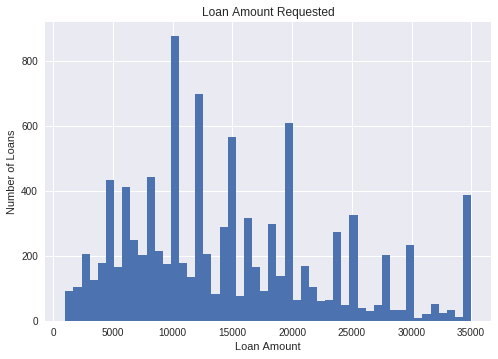

In [0]:
fig = data.loan_amnt.hist(bins=50)
fig.set_title('Loan Amount Requested')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')

1.2 Interest Rates

In [0]:
data.int_rate.unique()

array([15.8 , 11.67,  9.25,  6.24, 19.52, 15.88, 17.86, 16.55, 25.83,
        8.9 , 10.64,  7.9 , 16.99, 20.99, 10.99,  9.67, 11.44, 11.53,
       13.11, 13.33, 17.57, 19.99, 15.41,  6.17, 18.25, 16.2 ,  9.99,
       24.89, 12.69,  9.32, 19.05,  7.89, 11.55,  9.76,  8.18, 20.49,
        8.67,  9.17, 16.59, 15.61, 18.24, 14.91,  7.62, 13.99, 11.14,
       16.29, 14.99, 13.98, 13.53, 12.49, 14.64,  6.62,  5.93, 25.57,
       13.65,  5.32,  6.49, 15.22, 13.18, 11.49,  9.71, 14.33, 24.99,
       15.59, 18.99, 14.65, 13.67,  6.68, 12.59, 11.48,  6.03, 19.19,
       12.05, 13.57, 13.35, 12.85, 10.16,  8.49, 17.27,  7.26,  7.12,
       13.48,  8.39, 12.39, 12.99, 14.49, 11.26,  8.19, 10.15, 17.56,
       27.88, 19.97,  9.49, 13.66, 12.29, 21.48, 11.99, 11.22, 17.14,
       10.74, 13.23, 15.31, 12.12, 18.29, 18.75, 18.54, 24.5 ,  6.92,
       19.24, 10.49,  7.49, 17.76,  6.99, 22.99, 14.16, 13.68, 14.75,
       13.49, 10.  , 19.72,  7.69, 12.88,  6.  , 18.84, 15.33, 23.4 ,
       18.55, 14.09,

Text(0, 0.5, 'Number of Loans')

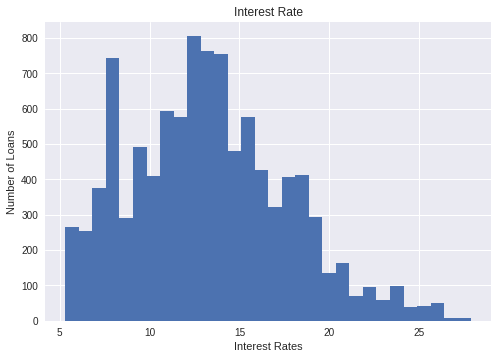

In [0]:
fig = data.int_rate.hist(bins=30)
fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rates')
fig.set_ylabel('Number of Loans')

1.3 Annual Income

In [0]:
data.annual_inc.unique()

array([ 90000., 102000.,  72000., ...,  26645., 243000.,  57672.])

Text(0, 0.5, 'Number of Customers')

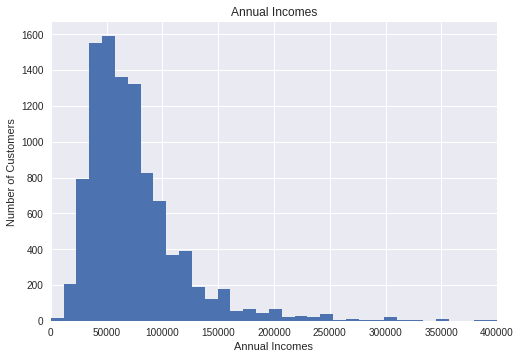

In [0]:
fig = data.annual_inc.hist(bins=200)
fig.set_xlim(0, 400000)
fig.set_title('Annual Incomes')
fig.set_xlabel('Annual Incomes')
fig.set_ylabel('Number of Customers')

**2.Discrete Variables**

2.1 Loan Status

In [0]:
data.loan_status.unique()

array(['Current', 'Fully Paid', 'Default', 'Charged Off',
       'Late (31-120 days)', 'Issued', 'In Grace Period',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off',
       'Late (16-30 days)'], dtype=object)

In [0]:
data['defaulted'] = np.where(data.loan_status.isin(['Default']),1,0)

In [0]:
data.head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m,defaulted
131079,23675.0,15.80,90000.0,Current,4.0,NaN,0
384935,7500.0,11.67,102000.0,Current,11.0,NaN,0
73585,11150.0,9.25,72000.0,Fully Paid,6.0,NaN,0
660814,8000.0,6.24,101400.0,Current,20.0,NaN,0
349757,34000.0,19.52,99000.0,Current,12.0,NaN,0


In [0]:
data[data.loan_status.isin(['Default'])].head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m,defaulted
444724,10200.0,25.83,37000.0,Default,8.0,NaN,1
241318,22000.0,20.99,44000.0,Default,12.0,NaN,1
345729,20000.0,11.67,140000.0,Default,9.0,NaN,1
738216,10000.0,13.99,53000.0,Default,4.0,NaN,1
282110,11950.0,17.57,40000.0,Default,14.0,NaN,1


Text(0, 0.5, 'Count')

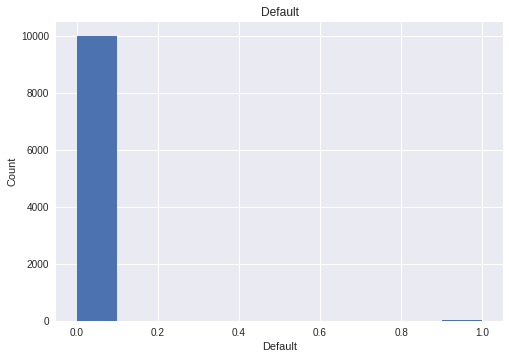

In [0]:
fig = data.defaulted.hist()
fig.set_title('Default')
fig.set_xlabel('Default')
fig.set_ylabel('Count')

In [0]:
2.2 Open Accounts

In [0]:
data.open_acc.unique()

array([ 4., 11.,  6., 20., 12.,  5.,  8.,  9., 18., 16., 10., 13., 14.,
        7., 19.,  3., 15., 17., 26.,  2., 27., 22., 21., 25., 23., 29.,
       39., 24., 30., 31., 28., 37., 32., 48., 33., 34.,  1., 35., 36.,
       41., 45., 40., 42.])

Text(0, 0.5, 'Count')

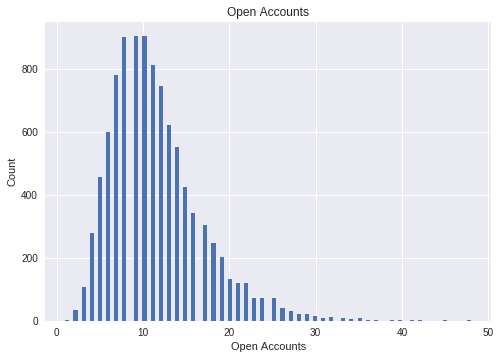

In [0]:
fig = data.open_acc.hist(bins = 100)
fig.set_title('Open Accounts')
fig.set_xlabel('Open Accounts')
fig.set_ylabel('Count')

In [0]:
2.3 Installment Accounts in 12 months

In [0]:
data.open_il_12m.dropna().unique()

array([1., 0., 2., 3., 4., 6.])

Text(0, 0.5, 'No of cutomers')

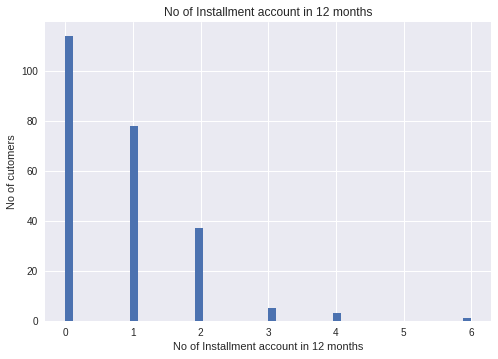

In [0]:
fig = data.open_il_12m.hist(bins = 50)
fig.set_title('No of Installment account in 12 months')
fig.set_xlabel('No of Installment account in 12 months')
fig.set_ylabel('No of cutomers')